# Assignment 1
# Python and Machine learning

## Deadline: Thursday, September 28 at 8:00 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

## Marks:
- Part 1. Create a class. 5 marks.
- Part 2. Machine learning. 5 marks.
- Total = 10 marks.

## Notes:
For each task, simply create code that accomplishes the task. Partial code is provided in some cases, your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs though. All required imports will be provided for you; you shouldn't import any other modules.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Part 1. Create a class.

Your task is create a class that represents points in 3-dimensions. The class will have methods for rotating and plotting the points.

All of the methods required for the class are provided in the partial code below. Just add the required code for the class to function.



p1 = [0. 0. 0.]
p2 = [1. 1. 1.]
p3 = [3. 0. 6.]
Distance between p1 and p2 = 1.73
Distance between p1 and p3 = 6.71
p2 = [ 1. -1.  1.]


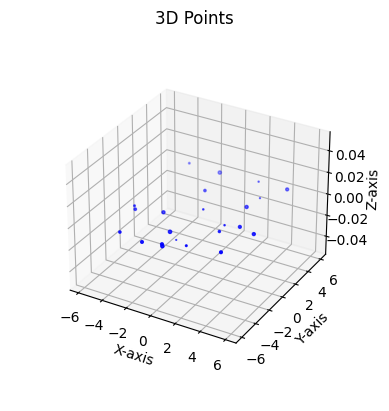

In [21]:
# Assignment 1 Part 1 

class Point3D:
    """A 3D point class"""

    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.p = np.array([float(x), float(y), float(z)])

    def __str__(self):
        return self.p.__str__()
    
    def set_xyz(self, x, y, z):
        self.p = np.array([float(x), float(y), float(z)])
    
    def get_xyz(self):
        return (self.p[0], self.p[1], self.p[2])
        
    def rotate_x(self, theta):
        t = np.deg2rad(theta)
        ct = np.cos(t)
        st = np.sin(t)
        R = np.array([[1,0,0],[0,ct,-st],[0,st,ct]])
        self.p = np.matmul(R, self.p)
    
    def rotate_y(self, theta):
        t = np.deg2rad(theta)
        ct = np.cos(t)
        st = np.sin(t)
        R = np.array([[ct,0,st],[0,1,0],[-st,0,ct]])
        self.p = np.matmul(R, self.p)

    def rotate_z(self, theta):
        t = np.deg2rad(theta)
        ct = np.cos(t)
        st = np.sin(t)
        R = np.array([[ct,-st,0],[st,ct,0],[0,0,ct]])
        self.p = np.matmul(R, self.p)
    
    def dist(self, a_point):
        d = np.sqrt( (self.p[0] - a_point.p[0])**2 + (self.p[1] - a_point.p[1])**2 + (self.p[2] - a_point.p[2])**2 )
        return d

    def plot(point_list):
        n = len(point_list)
        Px = np.zeros(n)
        Py = np.zeros(n)
        Pz = np.zeros(n)
        for i, point in enumerate(point_list):
            Px[i] = point.p[0]
            Py[i] = point.p[1]
            Pz[i] = point.p[2]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        plt.scatter(Px, Py, Pz, marker='o', color='b')
        plt.title('3D Points')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        ax.set_box_aspect(aspect=None, zoom=0.8)
        plt.show()

p1 = Point3D(0,0,0)
p2 = Point3D(1,1,1)
p3 = Point3D(3,0,6)

print('p1 = {}'.format(p1))
print('p2 = {}'.format(p2))
print('p3 = {}'.format(p3))

print('Distance between p1 and p2 = {:.2f}'.format(p1.dist(p2)))
print('Distance between p1 and p3 = {:.2f}'.format(p1.dist(p3)))

p2.rotate_x(90)
print('p2 = {}'.format(p2))

P_random = []
rng = np.random.default_rng()
for i in range(0, 50):
    x = rng.random() * 12 - 6
    y = rng.random() * 12 - 6
    z = rng.random() * 12 - 6
    P_random.append(Point3D(x, y, z))

Point3D.plot(P_random)

## Part 2. Machine learning.



In [8]:
# This code will download the required data files from GitHub

import requests, os

# Download data from GitHub
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'SirTurtle'
    repo = 'ML-BME-UofA-data'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

import os
if not os.path.exists('temp'):
   os.makedirs('temp')

            0          1
0   -2.326125  -2.875134
1    2.220891   8.387730
2    1.169612 -10.873056
3   -0.024919  -0.421372
4   -2.246128  -4.526292
..        ...        ...
245 -0.131762   2.759915
246  0.376296   4.569302
247  1.526797   4.059994
248 -0.734479  10.589901
249  2.997042  20.476636

[250 rows x 2 columns]


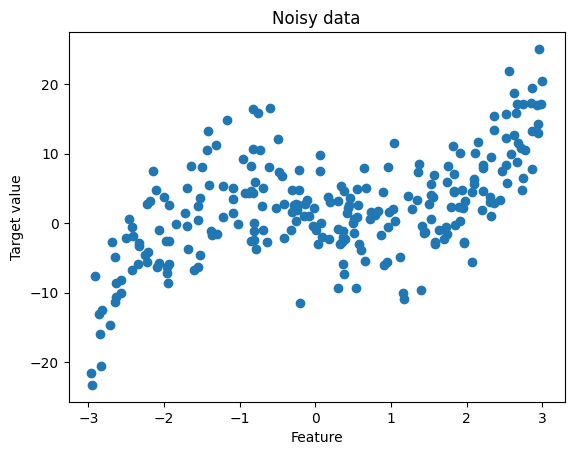

The best cross-validated R2 score on training set is 0.52
The best polynomial degree is 3
R2 score on test set is 0.6


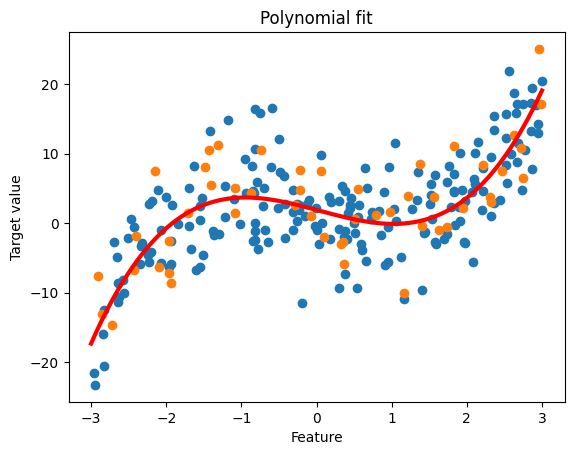

Coefficients:  [ 2. -3. -0.  1.]


In [5]:
# Assignment 1 Part 2

# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Download data
download_data('Week-2-Introduction-to-machine-learning/data/noisy_data.csv', 'temp/noisy_data.csv')

# Load data
import pandas as pd
df = pd.read_csv('temp/noisy_data.csv')

print(df)

X = df.values[:,0].reshape(-1,1)
y = df.values[:,1]

plt.plot(X, y, 'o')
plt.title('Noisy data')
plt.xlabel('Feature')
plt.ylabel('Target value')
plt.show()

# STRATIFIED TRAIN TEST SPLIT
bins = np.round(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=bins)

# CREATE POLYNOMIAL MODEL
pipeline = Pipeline((
    ("poly_features", PolynomialFeatures()),
    ("lin_reg", LinearRegression(fit_intercept=False)),
))

# CREATE PARAMETER GRID
#parameters = {"poly_features__degree": range(1,20)}
parameters = {"poly_features__degree": range(1,4)}
# Tip: Using 20 for max degree sometimes overfits the data!

# OPTIMISE HYPERPARAMETERS
# Create grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5)

# Fit GridSearchCV object
grid_search.fit(X_train,y_train)

# extract the selected model
best_model = grid_search.best_estimator_

# print out best score and chosen polynomial degree
print('The best cross-validated R2 score on training set is',round(grid_search.best_score_,2))
print('The best polynomial degree is',best_model.named_steps["poly_features"].degree)

# CALCULATE PERFORMANCE ON TEST SET
r2 = best_model.score(X_test, y_test)
print('R2 score on test set is', round(r2,2))

# PLOT THE FITTED MODEL
x_curve = np.linspace(-3,3,100).reshape(-1, 1)
y_curve = best_model.predict(x_curve)

plt.plot(X_train,y_train,'o')
plt.plot(X_test,y_test,'o')
plt.plot(x_curve,y_curve,'r',linewidth=3)

plt.title('Polynomial fit')
plt.xlabel('Feature')
plt.ylabel('Target value')
plt.show()

# COEFFICIENTS OF THE MODEL
coef = best_model.named_steps["lin_reg"].coef_
print('Coefficients: ',np.around(coef))